In [7]:
from topologies import RRG as RRG
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle

In [8]:
parameter_list = [(98, 11), (242, 17)] #(Number of vertices, Number of degree)
# parameter_list = [(98, 11), (242, 17), (338, 19), (578, 25), (722, 29), (1058, 35)] #(Number of vertices, Number of degree)

In [9]:
params=parameter_list[0]
rrg=RRG.RRGtopo(params[1], params[0] )

In [10]:
rrg.calculate_diameter()

3

In [11]:
length_3_routing_table=rrg.calculate_all_paths_within_length(3)

NameError: name 'calculate_ave_paths_length' is not defined

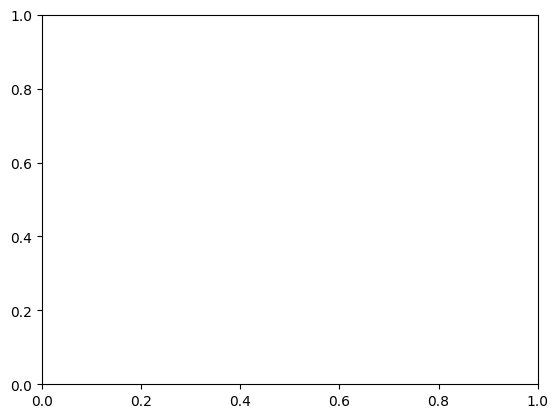

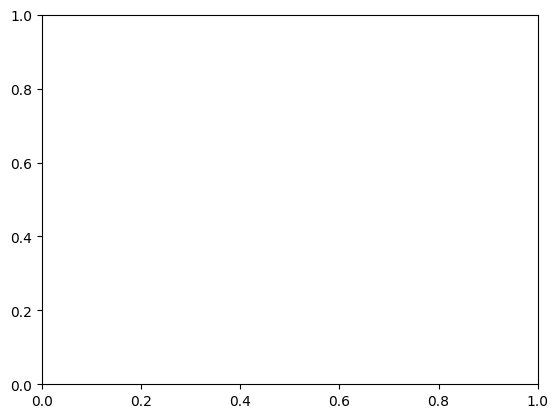

In [12]:
labels = []
colors=[]
line_colors=[]
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    colors.append(color)
    line_colors.append(violin["cbars"].get_color().flatten())
    labels.append((mpatches.Patch(color=color), label))
fig1 = plt.figure(0)
fig2 = plt.figure(1)
# Create an axes instance
ax1 = fig1.subplots()
ax2 = fig2.subplots()
x_labels1 = x_labels2= ["(98, 11)", "(242, 17)", "(338, 19)", "(578, 25)", "(722, 29)", "(1058, 35)"]

# ALLPATH_H, H=ceil(log_k N) routing algorithm:
counter=0
k=1 #compare with 1-shortest path routing

for params in parameter_list:
    counter+=1
    num_vertices=params[0]
    degree=params[1]
    # Read the pickled data 
    gdbg = pickle.load(open('./pickled_data/GDBG_({},{}).pickle'.format(num_vertices, degree), 'rb'))
    gdbg_ALLPATH_H_paths = pickle.load(open('./pickled_data/ALLPATH_{}_paths_GDBG_({},{}).pickle'.format(2,num_vertices, degree), 'rb')) 
    gdbg_ALLPATH_H_ave_length = calculate_ave_paths_length(gdbg_ALLPATH_H_paths)
    gdbg_k_shortest_paths, gdbg_ave_length = calculate_m_shortest_paths(pickle.load(open('./pickled_data/{}_shortest_paths_GDBG_({},{}).pickle'.format(degree,num_vertices, degree), 'rb')), k)
    gdbg_arc_load_k_shortest=GDBG.distribute_flow_on_paths(gdbg.edges(), gdbg_k_shortest_paths)
    gdbg_arc_load_ALLPATH_H=GDBG.distribute_flow_on_paths(gdbg.edges(), gdbg_ALLPATH_H_paths)

    if counter==1:
        add_label(ax1.violinplot(list(gdbg_ALLPATH_H_ave_length.values()), positions = [counter], showmeans=True), "GDBG with ALLPATH_H")
        add_label(ax1.violinplot(list(gdbg_ave_length.values()), positions = [counter], showmeans=True), "GDBG with 1-shortest")
    else:
        vl1=ax1.violinplot(list(gdbg_ALLPATH_H_ave_length.values()), positions = [counter], showmeans=True)
        vl1["bodies"][0].set_facecolor(colors[0])
        vl1["cbars"].set_color(line_colors[0])
        vl1["cmins"].set_color(line_colors[0])
        vl1["cmaxes"].set_color(line_colors[0])
        vl1["cmeans"].set_color(line_colors[0])
        vl2=ax1.violinplot(list(gdbg_ave_length.values()), positions = [counter], showmeans=True)
        vl2["bodies"][0].set_facecolor(colors[1])
        vl2["cbars"].set_color(line_colors[1])
        vl2["cmins"].set_color(line_colors[1])
        vl2["cmaxes"].set_color(line_colors[1])
        vl2["cmeans"].set_color(line_colors[1])

    vl1=ax2.violinplot(list(gdbg_arc_load_ALLPATH_H.values()), positions = [counter], showmeans=True)
    vl1["bodies"][0].set_facecolor(colors[0])
    vl1["cbars"].set_color(line_colors[0])
    vl1["cmins"].set_color(line_colors[0])
    vl1["cmaxes"].set_color(line_colors[0])
    vl1["cmeans"].set_color(line_colors[0])
    vl2=ax2.violinplot(list(gdbg_arc_load_k_shortest.values()), positions = [counter], showmeans=True)
    vl2["bodies"][0].set_facecolor(colors[1])
    vl2["cbars"].set_color(line_colors[1])
    vl2["cmins"].set_color(line_colors[1])
    vl2["cmaxes"].set_color(line_colors[1])
    vl2["cmeans"].set_color(line_colors[1])

ax1.set_xticks(list(range(1, 1+len(x_labels1))))
ax1.set_xticklabels(x_labels1)
ax1.set_xlabel("network size (#Router, #radix)")
ax1.set_ylabel("average path lengths")
ax1.legend(*zip(*labels), loc=3)

ax2.set_xticks(list(range(1, 1+len(x_labels2))))
ax2.set_xticklabels(x_labels2)
ax2.set_xlabel("network size (#Router, #radix)")
ax2.set_ylabel("Arc load")
ax2.legend(*zip(*labels), loc=2)
plt.show()
